In [0]:
# This is a R notebook

In [0]:
install.packages("vars")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘strucchange’, ‘urca’, ‘lmtest’, ‘sandwich’




In [0]:
library(vars)
library(readxl)

In [0]:
Test_dataset_v1 <- read_excel("Test dataset v1.xlsx")
df <- Test_dataset_v1[,2:39] # Omitting first column which is 'Period'

In [0]:
# This dataset corresponds to Hurdle 2.
# Missing values were filled and data was merged and sorted by time period and made a time series.
Test_dataset_v1_MV <- read_excel("new_train.xlsx")
df_MV <- Test_dataset_v1_MV[,2:39] # Omitting first column which is 'Period'

New names:
* `` -> ...1



## VAR models
*df* is original dataset of 39 periods given in Hurdle 1.<br>
*df_MV* is dataset of hurdle 2, imputed missing values and merged to form a time series.<br><br>

Aim is to forecast sales (EQ) for the next 6 time periods. i.e. For data upto 39 periods, forecast the next 6 time periods, upto period 45.<br><br>

Following is done for both datasets:<br>
- At first, the available data of 39 periods is split into insample (first 33 periods) and outsample (last 6 periods) and VAR model that fits the best is identified.<br>
- This model is then fitted to the entire (39 periods) data and forecast for next 6 periods is calculated.<br><br>

### Hurdle 1 dataset

In [0]:
# We work on log scale

df_train <- log(df[1:33,])
y_test <- log(df[34:39,1])

# Herre, EQ-1 , Social_search_impression-2 , Median_rainfall-14 , inflation-16,
# pct_PromoMarketDollars_Category-27 variables are included.

var_model <- VAR(df_train[,c(1,2,14,16,27)],p=4,type='trend')
fitted_EQ <- c(rep(NA,4),exp(fitted(var_model)[,1]))
actual_EQ <- exp(df_train$EQ)
y_forecast <- predict(var_model,n.ahead = 6)$fcst$EQ[,1]

EQ_test <- exp(y_test)
EQ_forecast <- exp(y_forecast)

res <- cbind(EQ_test,EQ_forecast)
res

EQ,EQ_forecast
<dbl>,<dbl>
244.9314,218.3736
175.4323,176.7109
168.1067,171.4833
161.5293,153.9942
151.6422,160.7552
130.9374,169.6175


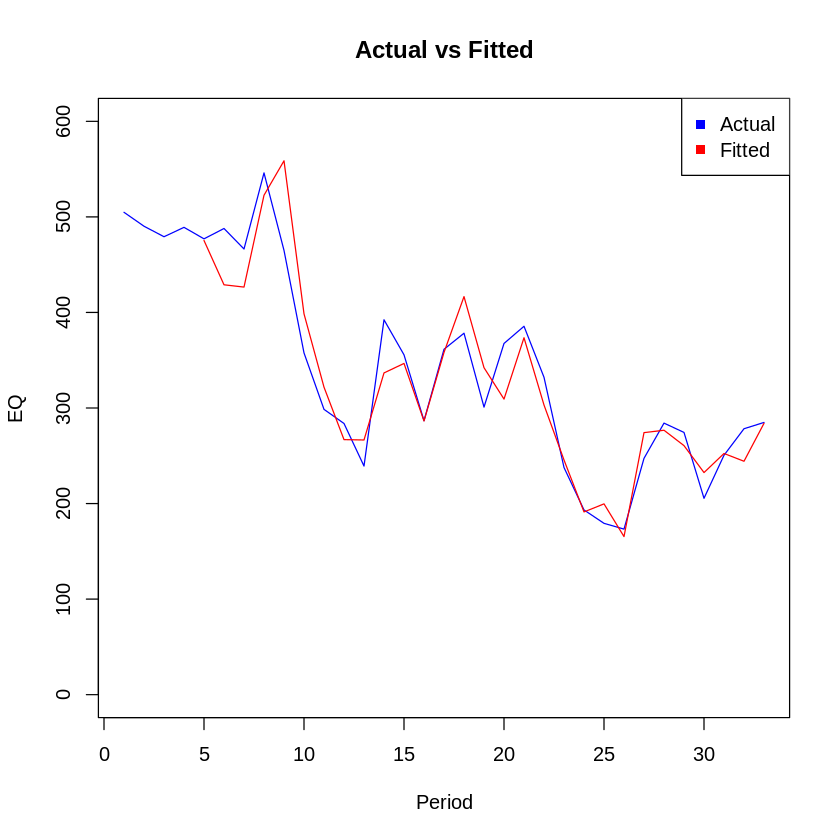

In [0]:
# Plot of actual EQ vs fitted EQ
plot(actual_EQ, type="l",col="blue",ylim=c(0,600),pch=15,main='Actual vs Fitted',ylab='EQ',xlab='Period')
lines(fitted_EQ, type="l",col="red",pch=15)
legend("topright",legend=c("Actual","Fitted"),pch=c(15,15),col=c('blue','red'))

In [0]:
# Train MAPE
train_mape_var_model <- sum(abs((actual_EQ[5:33] - fitted_EQ[5:33]) / fitted_EQ[5:33])) / 6
round(train_mape_var_model,4)
# Train MAPE is 36% for this model.

[1] 0.3589

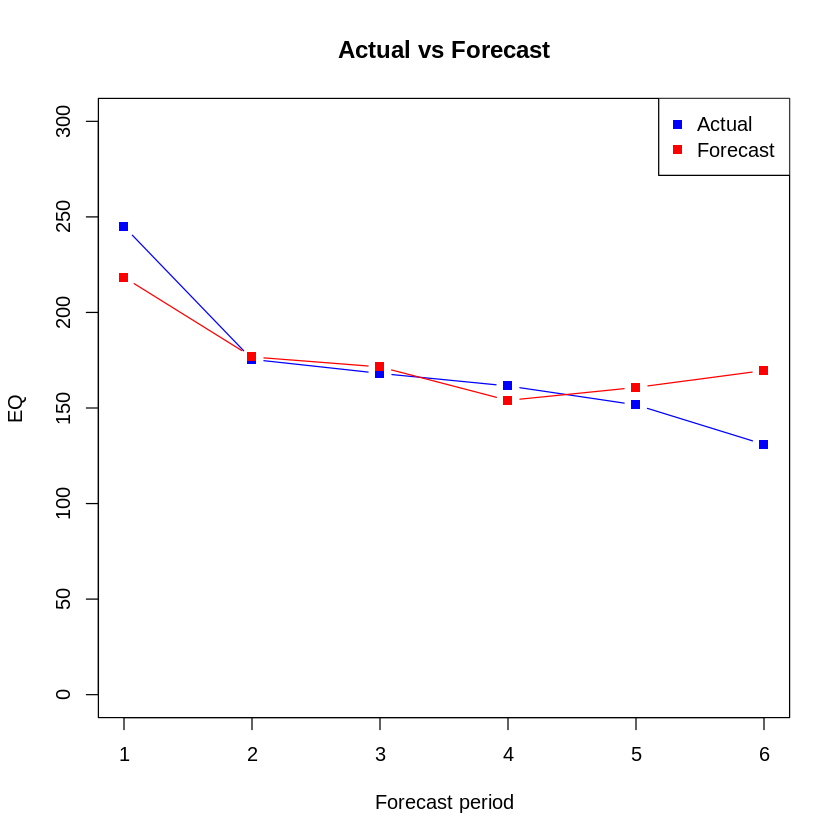

In [0]:
# Plot comparing forecast with corresponding original values
plot(res$EQ, type="b",col="blue",ylim=c(0,300),pch=15,main='Actual vs Forecast',ylab='EQ',xlab='Forecast period')
lines(res$EQ_forecast, type="b",col="red",pch=15)
legend("topright",legend=c("Actual","Forecast"),pch=c(15,15),col=c('blue','red'))

In [0]:
# Test MAPE
test_mape_var_model <- sum(abs((res$EQ - res$EQ_forecast) / res$EQ)) / 6
round(test_mape_var_model,4)
# Test MAPE is 9% for this model.

[1] 0.0897

#### Final VAR model for Hurdle 1 dataset

In [0]:
df_final <- log(df)
EQ <- df$EQ

# e.g. Here, EQ-1 , Social_search_impression-2 , Median_rainfall-14 , inflation-16,
# pct_PromoMarketDollars_Category-27 variables are included.

final_var_model <- VAR(df_final[,c(1,2,14,16,27)],p=4,type='trend')
final_fitted_EQ <- c(rep(NA,4),exp(fitted(final_var_model)[,1]))
final_actual_EQ <- exp(df_final$EQ)
y_final_forecast <- predict(final_var_model,n.ahead = 6)$fcst$EQ[,1]

EQ_final_forecast <- exp(y_forecast)

full_EQ_forecast <- c(EQ,EQ_final_forecast)

In [0]:
# Final forecast of 6 period ahead
EQ_final_forecast

[1] 218.3736 176.7109 171.4833 153.9942 160.7552 169.6175

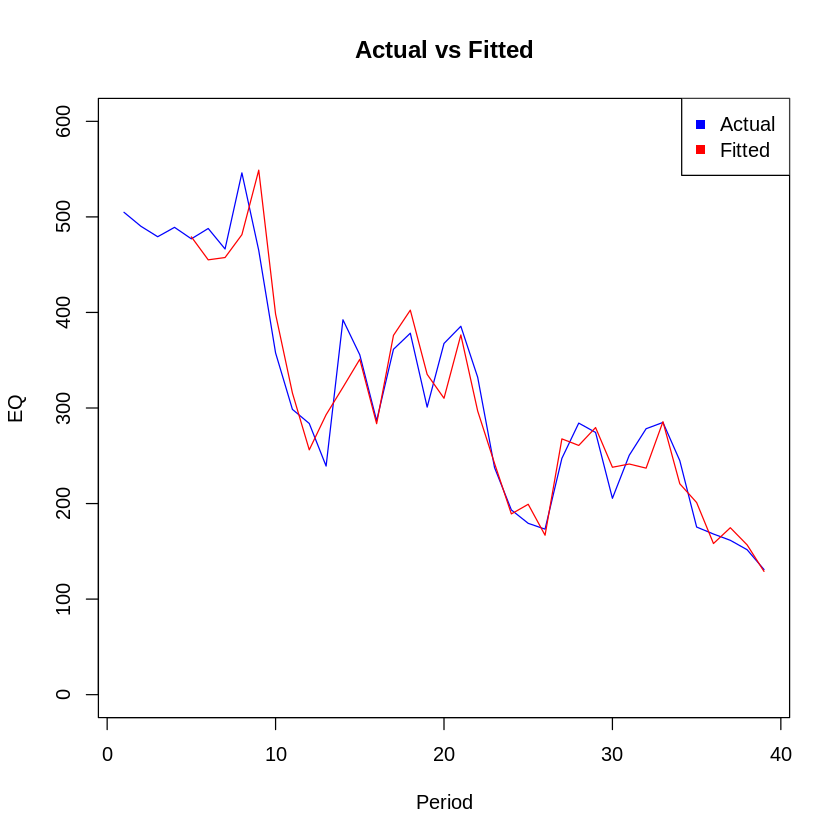

In [0]:
# Plot of actual EQ vs fitted EQ
plot(final_actual_EQ, type="l",col="blue",ylim=c(0,600),pch=15,main='Actual vs Fitted',ylab='EQ',xlab='Period')
lines(final_fitted_EQ, type="l",col="red",pch=15)
legend("topright",legend=c("Actual","Fitted"),pch=c(15,15),col=c('blue','red'))

In [0]:
# Train MAPE
train_mape_final_var_model <- sum(abs((final_actual_EQ[5:39] - final_fitted_EQ[5:39]) / final_fitted_EQ[5:39])) / 6
round(train_mape_final_var_model,4)
# Train MAPE is 45% for this model.

[1] 0.4565

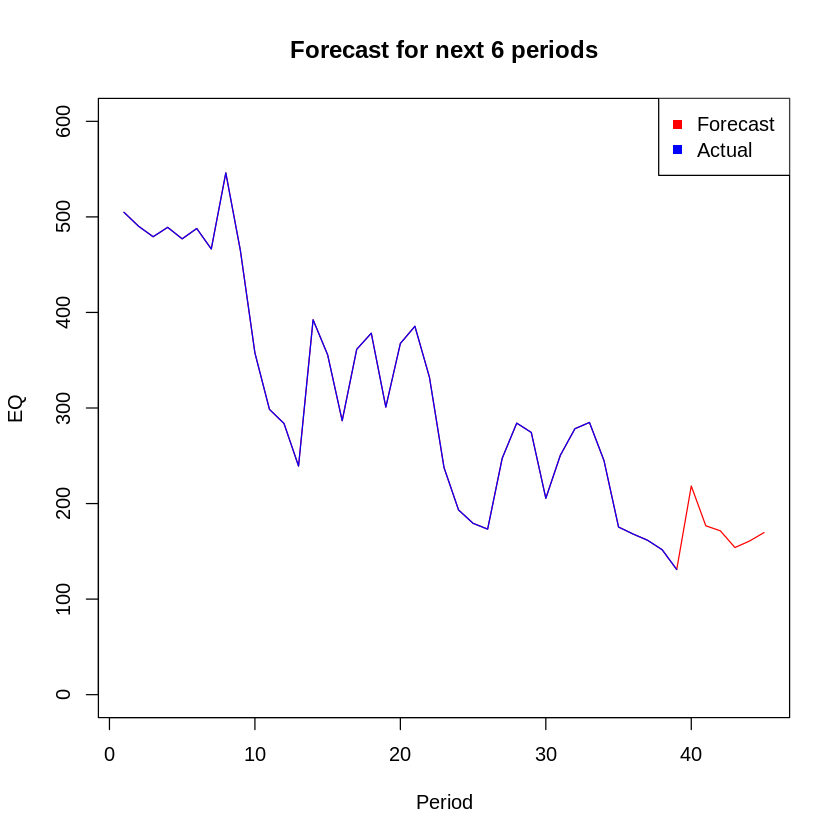

In [0]:
# Plot of original EQ values along with forecat for next 6 periods.
plot(full_EQ_forecast, type="l", col="red",ylim=c(0,600),main='Forecast for next 6 periods',ylab='EQ',xlab='Period',pch=15)
lines(EQ, type="l",col="blue",pch=15)
legend("topright",legend=c("Forecast","Actual"),pch=c(15,15),col=c('red','blue'))
# Red is forecasted values for next 6 periods. i.e. period 40 to 45

### Hurdle 2 dataset
Dataset formed by imputing values to the data provided<br><br>

In [0]:
df_train_MV <- log(df_MV[1:33,])
y_test_MV <- log(df_MV[34:39,1])

# Here, Variables EQ-1 , Social_search_impression-2 , Median_rainfall-14 , inflation-16,
# pct_PromoMarketDollars_Category-27, pct_PromoMarketDollars_Subcategory are included.

var_model_MV <- VAR(df_train_MV[,c(1,2,14,16,27,37)],p=4,type='trend')
fitted_EQ_MV <- c(rep(NA,4),exp(fitted(var_model_MV)[,1]))
actual_EQ_MV <- exp(df_train_MV$EQ)
y_forecast_MV <- predict(var_model_MV,n.ahead = 6)$fcst$EQ[,1]

EQ_test_MV <- exp(y_test_MV)
EQ_forecast_MV <- exp(y_forecast_MV)

res_MV <- cbind(EQ_test_MV,EQ_forecast_MV)

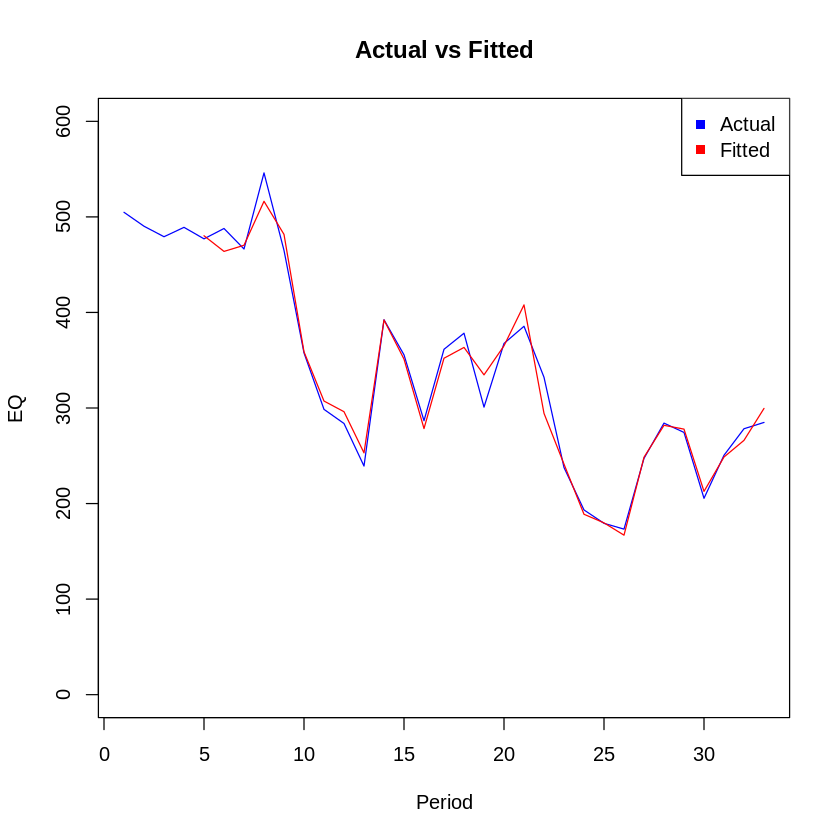

In [0]:
# Plot of actual EQ vs fitted EQ
plot(actual_EQ_MV, type="l",col="blue",ylim=c(0,600),pch=15,main='Actual vs Fitted',ylab='EQ',xlab='Period')
lines(fitted_EQ_MV, type="l",col="red",pch=15)
legend("topright",legend=c("Actual","Fitted"),pch=c(15,15),col=c('blue','red'))

In [0]:
# Train MAPE
train_mape_var_model_MV <- sum(abs((actual_EQ_MV[5:33] - fitted_EQ_MV[5:33]) / fitted_EQ_MV[5:33])) / 6
round(train_mape_var_model_MV,4)
# Train MAPE is 15% for this model.

[1] 0.1547

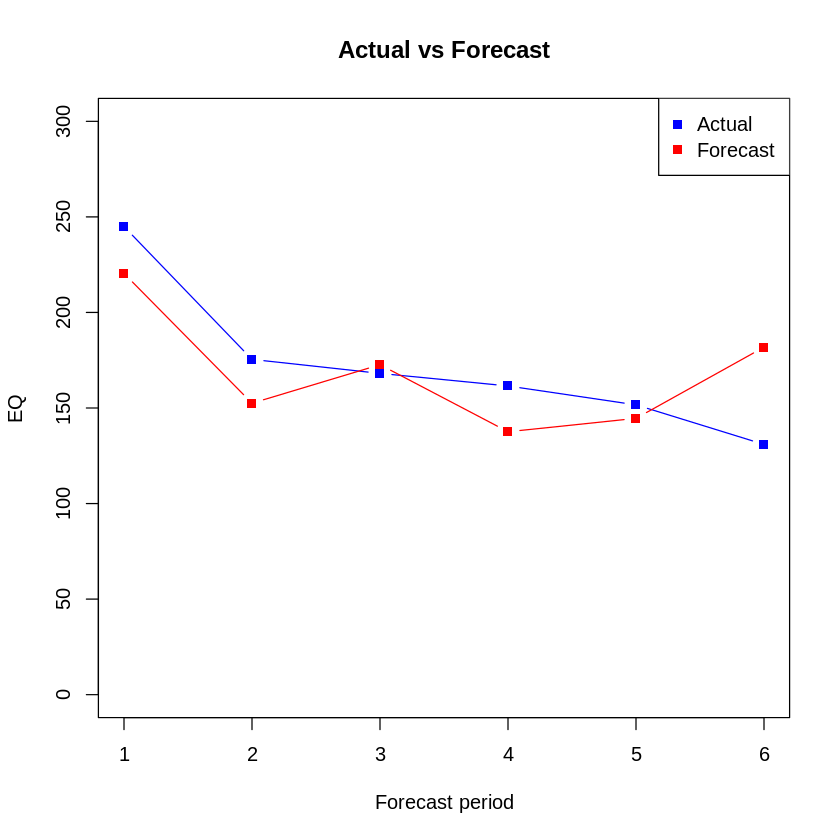

In [0]:
# Plot of Actual vs Forecast on periods 34 to 39
plot(res_MV$EQ, type="b",col="blue",ylim=c(0,300),pch=15,main='Actual vs Forecast',ylab='EQ',xlab='Forecast period')
lines(res_MV$EQ_forecast, type="b",col="red",pch=15)
legend("topright",legend=c("Actual","Forecast"),pch=c(15,15),col=c('blue','red'))

In [0]:
# Test MAPE
mape_var_model_MV <- sum(abs((res_MV$EQ - res_MV$EQ_forecast) / res_MV$EQ)) / 6
round(mape_var_model_MV,4)
# Test MAPE is 14% in Hurdle 2 dataset where missing values were imputed

[1] 0.1403

#### Final VAR model for Hurdle 2 dataset

In [0]:
df_final_MV <- log(df_MV)
EQ_MV <- df_MV$EQ

# Here, variables EQ-1 , Social_search_impression-2 , Median_rainfall-14 , inflation-16,
# pct_PromoMarketDollars_Category-27, pct_PromoMarketDollars_Subcategory-37 are included.

final_var_model_MV <- VAR(df_final_MV[,c(1,2,14,16,27,37)],p=4,type='trend')
final_fitted_EQ_MV <- c(rep(NA,4),exp(fitted(final_var_model_MV)[,1]))
final_actual_EQ_MV <- exp(df_final_MV$EQ)
y_final_forecast_MV <- predict(final_var_model_MV,n.ahead = 6)$fcst$EQ[,1]

EQ_final_forecast_MV <- exp(y_forecast_MV)

full_EQ_forecast_MV <- c(EQ_MV,EQ_final_forecast_MV)

In [0]:
# Final forecast of 6 period ahead
EQ_final_forecast_MV

[1] 220.4010 152.5063 172.6579 137.5757 144.5795 181.8443

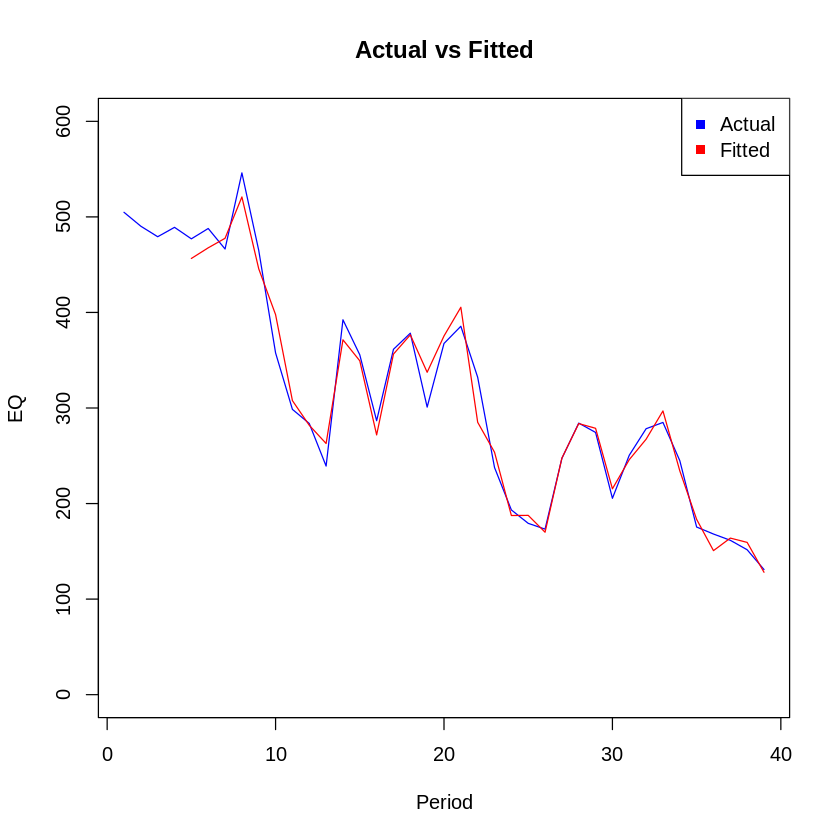

In [0]:
# Plot of actual EQ vs fitted EQ
plot(final_actual_EQ_MV, type="l",col="blue",ylim=c(0,600),pch=15,main='Actual vs Fitted',ylab='EQ',xlab='Period')
lines(final_fitted_EQ_MV, type="l",col="red",pch=15)
legend("topright",legend=c("Actual","Fitted"),pch=c(15,15),col=c('blue','red'))

In [0]:
# Train MAPE
train_mape_final_var_model_MV <- sum(abs((final_actual_EQ_MV[5:39] - final_fitted_EQ_MV[5:39]) / final_fitted_EQ_MV[5:39])) / 6
round(train_mape_final_var_model_MV,4)
# Train MAPE is 25% for this model.

[1] 0.2555

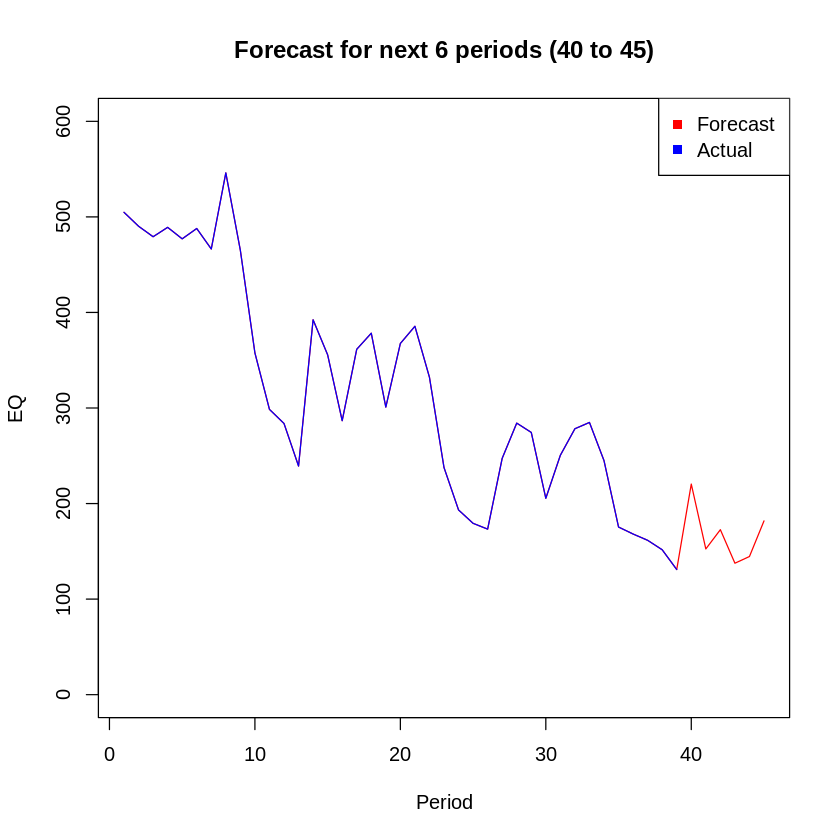

In [0]:
plot(full_EQ_forecast_MV, type="l", col="red",ylim=c(0,600),main='Forecast for next 6 periods (40 to 45)',ylab='EQ',xlab='Period',pch=15)
lines(EQ_MV, type="l",col="blue",pch=15)
legend("topright",legend=c("Forecast","Actual"),pch=c(15,15),col=c('red','blue'))
# Red is forecasted values for next 6 periods. i.e. period 40 to 45